<font color="red" size="6"> Multiple Linear Regression Model </font>

<font color="red" size="5">Problem Statement: </font> Build a multiple linear regression model to predict the demand for shared bikes based on various influencing factors.

## Step 1: Reading,Understandingand Visualising the data


In [3]:
# import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')

In [4]:
# Set display options to show more rows/columns

pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', None)     # Display all rows

In [5]:
#Create a dataframe and load the csv into the dataframe

df_bikes = pd.read_csv("C:/Users/Gaura/OneDrive/Desktop/day (1).csv")
df_bikes.head() # Review the structure and content of the dataset by displaying the first few rows with the head() function.


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
#shape of the dataframe

df_bikes.shape  

(730, 16)

In [7]:
# Obtain summary statistics using the describe() function.

df_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#Examine the dataset structure using the info() function

df_bikes.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
# Removing unwanted columns

df_bikes.drop(columns=['dteday','instant','casual','registered'],inplace=True)
df_bikes.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Univariate Analysis

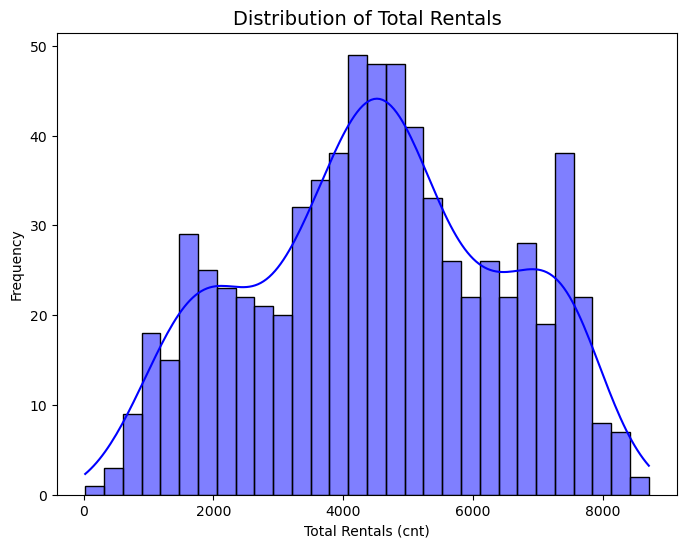

In [11]:
# Visualization and Distribution of total rentals
plt.figure(figsize=(8, 6))
sns.histplot(data=df_bikes, x="cnt", kde=True, color="blue", bins=30)
plt.title("Distribution of Total Rentals", fontsize=14)
plt.xlabel("Total Rentals (cnt)")
plt.ylabel("Frequency")
plt.show()

##### The distribution of the variable cnt (total rentals), as visualized through the histogram and KDE plot, suggests that cnt may follow a normal distribution. 

<Axes: ylabel='cnt'>

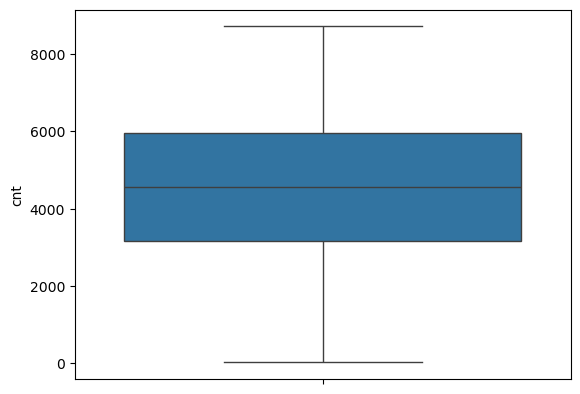

In [12]:
# Visualisation of Outliers if any

sns.boxplot(df_bikes['cnt'])

##### The boxplot of cnt (total rentals) does not show any outliers, it indicates that the data is relatively consistent and does not have extreme values.

<Axes: xlabel='workingday', ylabel='cnt'>

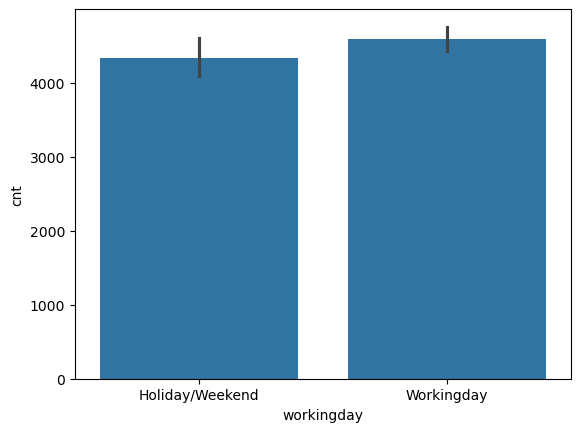

In [13]:
# Plot the trend over Working day

working_day={0:'Holiday/Weekend',1:'Workingday'} # define mapping for working day

sns.barplot(data=df_bikes,x=df_bikes['workingday'].map(working_day),y='cnt')

##### Although the difference is slight, the data suggests that people tend to rent bikes more frequently on weekdays. This could be attributed to the nature of usage patterns, where bikes are likely used for commuting or regular transportation during workdays.

<Axes: xlabel='weekday', ylabel='cnt'>

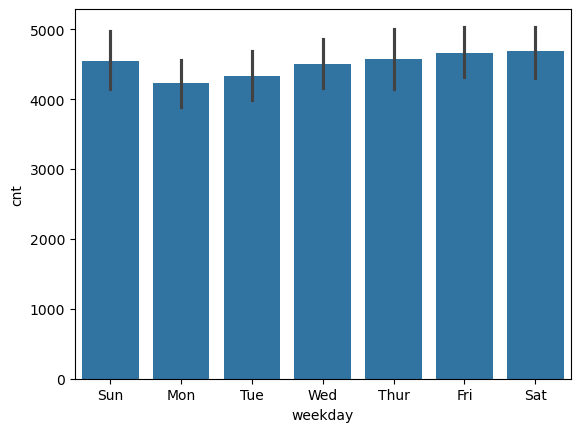

In [14]:
# Plot the trend over Day_of_week

# Define a mapping for the 'weekday' column
weekday_map = {
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thur',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
}

sns.barplot(data=df_bikes,x=df_bikes['weekday'].map(weekday_map),y='cnt') # plot graph

<Axes: title={'center': 'Total Rentals by Year'}, xlabel='Year', ylabel='Total Rentals'>

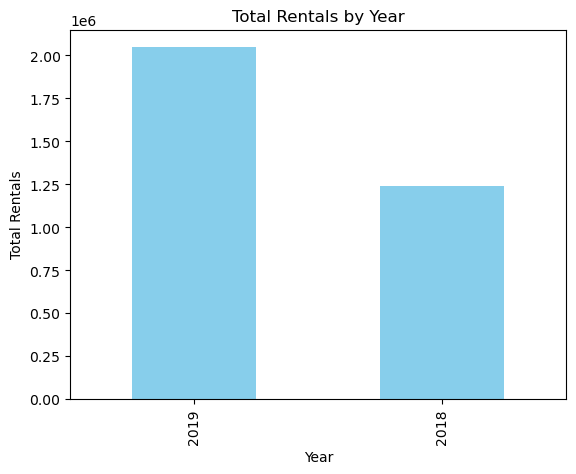

In [15]:
#Rentals by Year

# Define a mapping for the 'yr' column
yr_map = {0: '2018', 1:2019 }

rentals_by_year = df_bikes.groupby(df_bikes['yr'].map(yr_map))['cnt'].sum()
rentals_by_year.plot(kind='bar', title='Total Rentals by Year', ylabel='Total Rentals', xlabel='Year', color='skyblue')

<Axes: title={'center': 'Total Rental by Month'}, xlabel='Month', ylabel='Total Rental'>

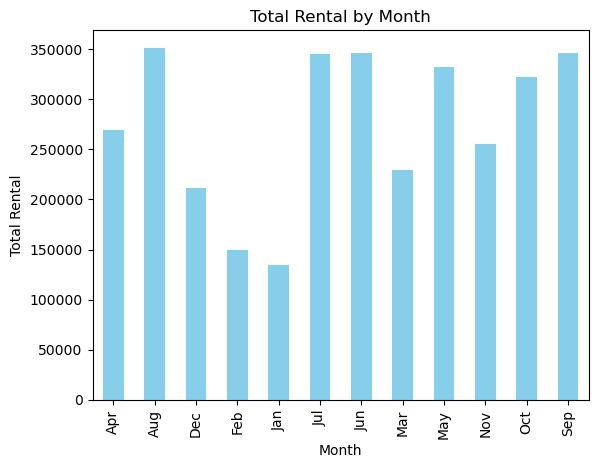

In [16]:
#Rentals by Month

month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',  # mapping by month
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

rental_by_month = df_bikes.groupby(df_bikes['mnth'].map(month_map))['cnt'].sum()
rental_by_month.plot(kind='bar', title='Total Rental by Month', ylabel='Total Rental',xlabel='Month',color='skyblue')


##### As per the above trend it indicates several potential factors related to seasonality, weather, and user behavior. Lets furthur analyse the rental trend by season.

<Axes: title={'center': 'Total Rental by season'}, xlabel='Season', ylabel='Total Rental'>

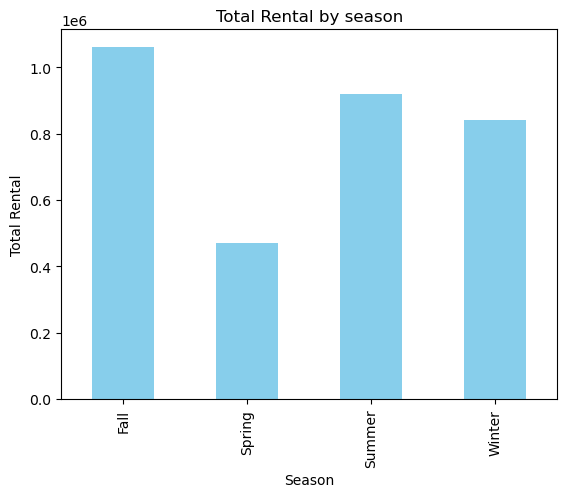

In [17]:
#Rentals by Season

# Define a mapping for the 'season' column
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

# Map the 'season'to the corresponding escription
rental_by_season = df_bikes.groupby(df_bikes['season'].map(season_map))['cnt'].sum()
rental_by_season.plot(kind='bar', title='Total Rental by season', ylabel='Total Rental',xlabel='Season',color='skyblue')

##### It indicates a few specific trends related to seasonality and weather

# Bivariate analysis

<Axes: xlabel='temp', ylabel='cnt'>

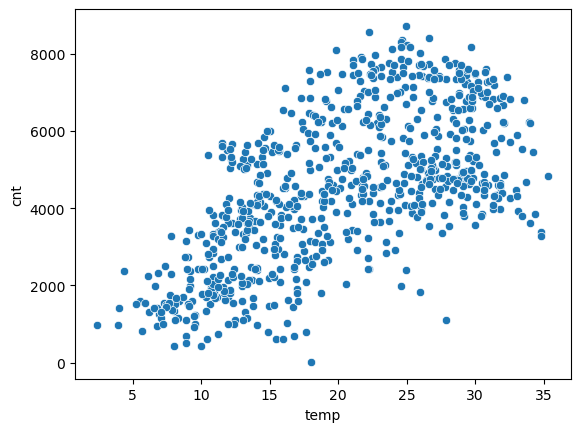

In [19]:
# Rental counts and Temp
sns.scatterplot(data=df_bikes,x='temp',y='cnt')

##### Higher temperatures seem to drive an increase in bike rentals, likely because warm weather encourages a more active lifestyle. People may be more inclined to choose biking as a form of exercise or transportation during pleasant weather, making it a preferred activity over other options.

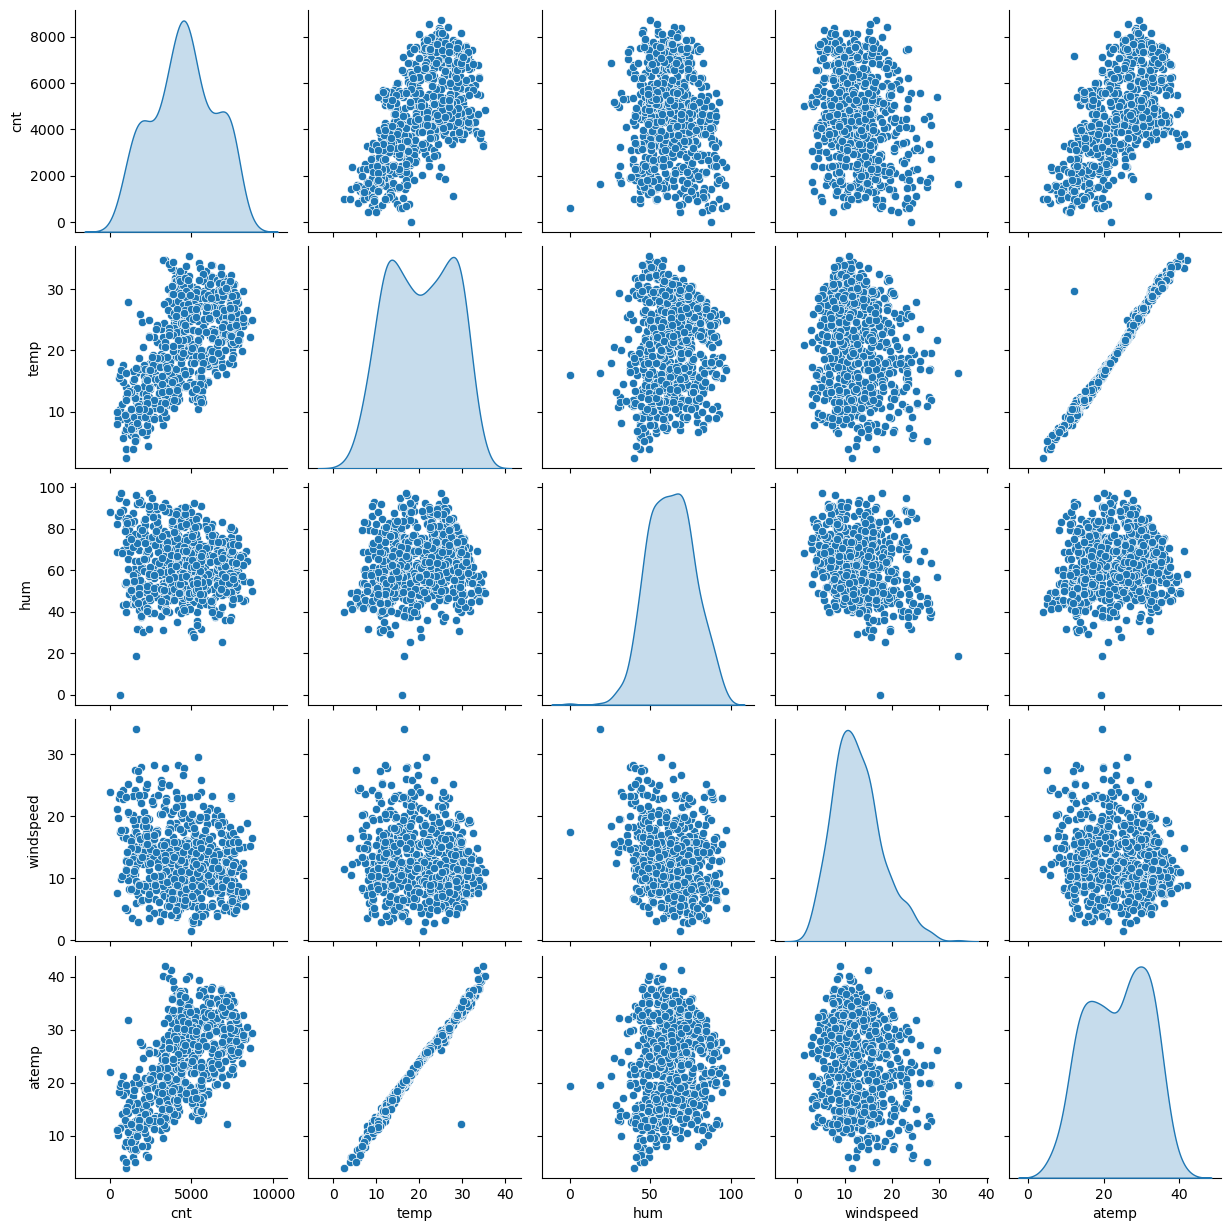

In [134]:
numerical_vars = ['cnt', 'temp', 'hum', 'windspeed', 'atemp']  # Include dataset's relevant numerical columns

# Create the pair-plot
sns.pairplot(data=df_bikes, vars=numerical_vars, diag_kind='kde', height=2.5)

# Display the plot
plt.show()

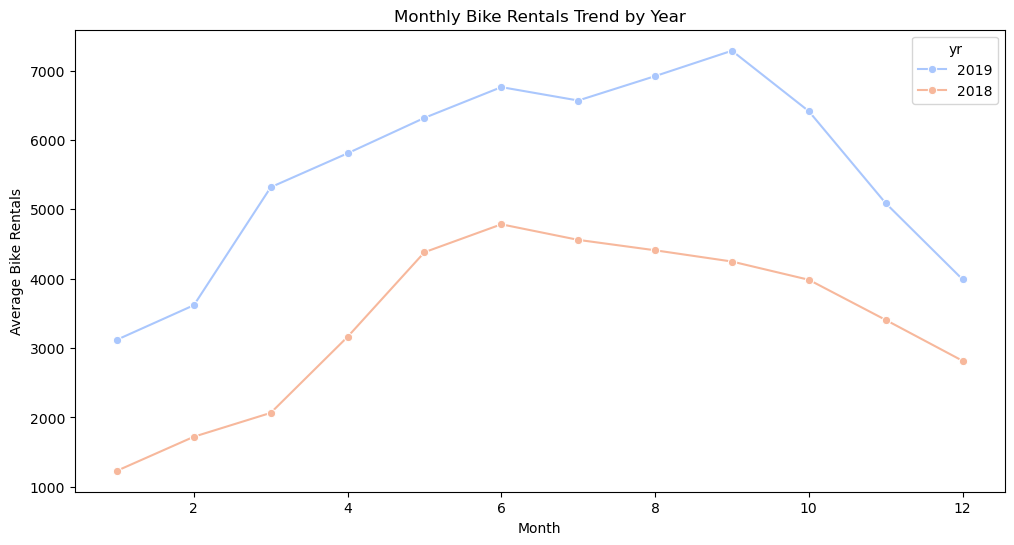

In [20]:
# Define a mapping for the 'yr' column
yr_map = {0: '2018', 1:2019 }

# Group by year and month to calculate the average rentals
monthly_trends = df_bikes.groupby([df_bikes['yr'].map(yr_map),df_bikes['mnth']])['cnt'].mean().reset_index()

# Plot the trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt', data=monthly_trends, hue='yr', palette='coolwarm', marker='o')

# Add titles and labels
plt.title('Monthly Bike Rentals Trend by Year')
plt.xlabel('Month')
plt.ylabel('Average Bike Rentals')
plt.show()

##### Analysis of the distribution of bike rentals across different months and years to identify trends, seasonality, and patterns in rental activity over time.

## Multivariate Analysis

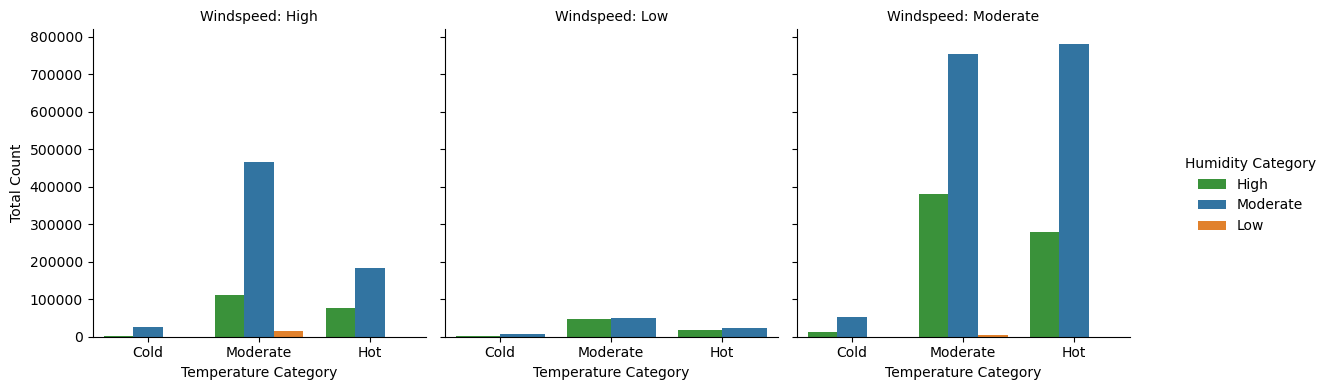

In [22]:
# Define function for category of temperature

def temp_category(temp):
    if temp <= 10:
        return 'Cold'
    elif 10 < temp <= 25:
        return 'Moderate'
    else:
        return 'Hot'

# Define function to categorize humidity
def humidity_category(hum):
    if 0 <= hum <= 30:
        return 'Low'
    elif 30 < hum <= 70:
        return 'Moderate'
    elif 70 < hum <= 100:
        return 'High'
    else:
        return 'Out of Range'  # in case the humidity is outside the 0-100 range

# Define function to categorize windspeed

def windspeed_category(wind):
    if 0 <= wind <= 5:
        return 'Low'
    elif 5 < wind <= 15:
        return 'Moderate'
    else:
        return 'High'

# Using the functions during aggregation
agg_data = (
    df_bikes.groupby([
        df_bikes['temp'].apply(temp_category),
        df_bikes['hum'].apply(humidity_category),
        df_bikes['windspeed'].apply(windspeed_category) ])['cnt'].sum().reset_index()
)

agg_data.columns = ['temp_category', 'hum_category', 'windspeed_category', 'cnt']

# Create a FacetGrid to show subplots for each windspeed category
g = sns.FacetGrid(
    agg_data,
    col="windspeed_category",  # Facet by windspeed_category
    margin_titles=True,
    height=4,
    sharey=True
)

# Define a custom color palette for hum_category
custom_palette = {
    "Moderate": "#1f77b4",  # Blue
    "Low": "#ff7f0e",       # Orange
    "High": "#2ca02c"       # Green
}

# Map a barplot to each subplot
g.map(sns.barplot, 'temp_category', 'cnt', 'hum_category', ci=None, palette=custom_palette, order=['Cold', 'Moderate', 'Hot'])

# Add titles and adjust layout
g.set_axis_labels("Temperature Category", "Total Count")
g.set_titles(col_template="Windspeed: {col_name}")  # Label each facet
g.add_legend(title="Humidity Category")            # Add legend

plt.show()

##### We can conclude that bike rentals are higher under conditions of moderate temperature, humidity, and wind speed, suggesting that these factors together create optimal conditions for increased bike usage.

<Axes: >

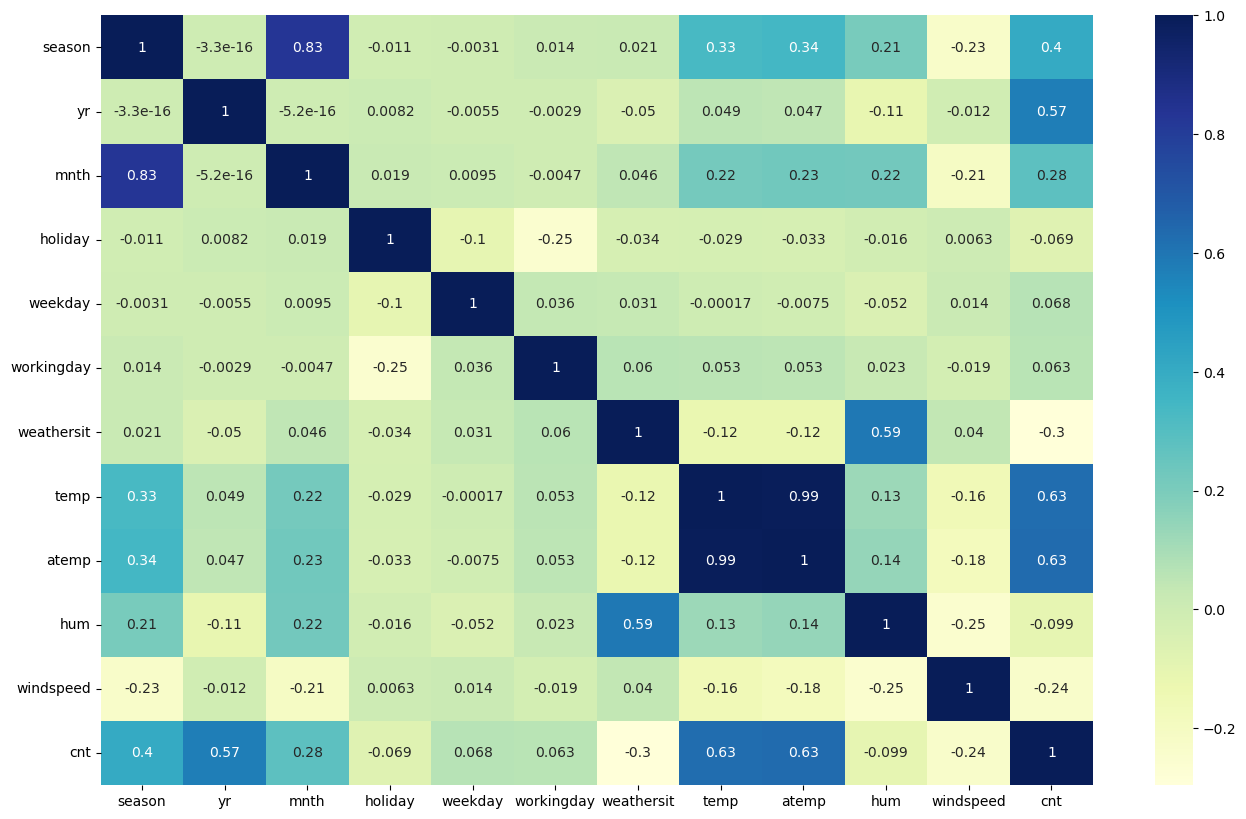

In [23]:
plt.figure(figsize=(16,10))
sns.heatmap(df_bikes.corr(),annot=True,cmap='YlGnBu')

##### As observed, season, temperature, and humidity are the most strongly correlated factors influencing bike rentals.

## Step2: Preparing the data for modelling
- Encoding 
   - converting binary variables to 1/0 
   - other categorical variables to dummy variables

In [25]:
# Define the weather map
weather_map = {
    1: 'Clear, Few clouds, Partly cloudy',
    2: 'Mist + Cloudy + Few clouds',
    3: 'Light Snow/Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist/Snow + Fog'
}

# Map the 'weathersit' column to descriptive labels
df_bikes['weather_desc'] = df_bikes['weathersit'].map(weather_map)

# Create dummy variables for the 'weather_desc' column
weather_dummies = pd.get_dummies(df_bikes['weather_desc'], drop_first=True).astype(int)

# Concatenate the dummy variables with the original DataFrame
df_bikes = pd.concat([df_bikes, weather_dummies], axis=1)

# Drop the original 'weathersit' and 'weather_desc' columns if not needed
df_bikes = df_bikes.drop(['weathersit', 'weather_desc'], axis=1)


In [26]:
df_bikes.head()

,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Light Snow/Light Rain + Scattered clouds,Mist + Cloudy + Few clouds
0,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,1
1,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1
2,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0
3,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0
4,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0


In [27]:
# Define a mapping for the 'season' column
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

# Map the 'season' column to descriptive labels
df_bikes['season_desc'] = df_bikes['season'].map(season_map)

# Create dummy variables for the 'season_desc' column
season_dummies = pd.get_dummies(df_bikes['season_desc'], drop_first=True).astype(int)

# Concatenate the dummy variables with the original DataFrame
df_bikes = pd.concat([df_bikes, season_dummies], axis=1)

# Drop the original 'season' and 'season_desc' columns if not needed
df_bikes = df_bikes.drop(['season','season_desc'], axis=1)


In [28]:
# Define a mapping for the 'mnth' column
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',  # mapping by month
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
\
# Map the 'mnth' column to descriptive labels
df_bikes['month_desc'] = df_bikes['mnth'].map(month_map)

# Create dummy variables for the 'month_desc' column
month_dummies = pd.get_dummies(df_bikes['month_desc'], drop_first=True).astype(int)

# Concatenate the dummy variables with the original DataFrame
df_bikes = pd.concat([df_bikes, month_dummies], axis=1)

# Drop the original 'season' and 'season_desc' columns if not needed
df_bikes = df_bikes.drop(['mnth','month_desc'], axis=1)


In [29]:
# Define a mapping for the 'weekday' column
weekday_map = {
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thur',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
}
# Map the 'weekday' column to descriptive labels
df_bikes['weekday_desc'] = df_bikes['weekday'].map(weekday_map)

# Create dummy variables for the 'weekday_desc' column
weekday_dummies = pd.get_dummies(df_bikes['weekday_desc'], drop_first=True).astype(int)

# Concatenate the dummy variables with the original DataFrame
df_bikes = pd.concat([df_bikes, weekday_dummies], axis=1)

# Drop the original 'weekday' and 'weekday_desc' columns if not needed
df_bikes = df_bikes.drop(['weekday','weekday_desc'], axis=1)


In [30]:
df_bikes.shape

(730, 30)

In [31]:
df_bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light Snow/Light Rain + Scattered clouds,Mist + Cloudy + Few clouds,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


## Linear Regression

In [33]:
#Splitting the data into train and test
df_train,df_test = train_test_split(df_bikes, train_size=0.7,test_size=0.3,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [34]:
#Rescaling the Features

# Instantiate an Object
scaler = MinMaxScaler()

#create a list of numeric variable
num_vars = ['temp','atemp','hum','windspeed','cnt']

#Fit on data
df_train[num_vars]= scaler.fit_transform(df_train[num_vars])  # Fit and transform the data      
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light Snow/Light Rain + Scattered clouds,Mist + Cloudy + Few clouds,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Step 3: Training the model

In [36]:
#model1

X_train = df_train[['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
     'Light Snow/Light Rain + Scattered clouds',
       'Mist + Cloudy + Few clouds', 'Spring', 'Summer', 'Winter', 'Aug',
       'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Mon', 'Sat', 'Sun', 'Thur', 'Tue', 'Wed']]
y_train = df_train['cnt']

# add constant
X_train_sm = sm.add_constant(X_train)

# create first model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model1 = lr.fit()

#summary
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          8.42e-181
Time:                        21:07:33   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.2413      0.035      6.826      0.000       0.172       0.311
yr                                           0.2322      0.008     28.792      0.000       0.216       0.248
holiday                                      0.0048      0.024      0.202      0.840      -0.042       0.052
workingday                                   0.0911      0.012      7.359      0.000       0.067       0.115
temp                                         0.4013      0.142      2.821      0.005       0.122       0.681
atemp                                        0.0506      0.138      0.366      0.714      -0.221       0.322
hum                                         -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed                                   -0.1844      0.026     -7.003      0.000      -0.236      -0.133
Light Snow/Light Rain + Scattered clouds    -0.2567      0.026     -9.712      0.000      -0.309      -0.205
Mist + Cloudy + Few clouds                  -0.0610      0.010     -5.845      0.000      -0.082      -0.041
Spring                                      -0.0486      0.030     -1.618      0.106      -0.108       0.010
Summer                                       0.0382      0.026      1.455      0.146      -0.013       0.090
Winter                                       0.1054      0.028      3.770      0.000       0.050       0.160
Aug                                          0.0161      0.034      0.473      0.637      -0.051       0.083
Dec                                         -0.0456      0.034     -1.356      0.176      -0.112       0.020
Feb                                         -0.0322      0.033     -0.978      0.329      -0.097       0.032
Jan                                         -0.0626      0.034     -1.864      0.063      -0.129       0.003
Jul                                         -0.0393      0.035     -1.116      0.265      -0.108       0.030
Jun                                         -0.0017      0.025     -0.067      0.946      -0.051       0.048
Mar                                          0.0013      0.025      0.052      0.958      -0.047       0.050
May                                          0.0247      0.021      1.169      0.243      -0.017       0.066
Nov                                         -0.0418      0.036     -1.149      0.251      -0.113       0.030
Oct                                          0.0077      0.036      0.215      0.830      -0.063       0.078
Sep                                          0.0818      0.032      2.549      0.011       0.019       0.145
Mon                                          0.0454      0.014      3.286      0.001       0.018       0.073
Sat                            

In [37]:
vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Feature,VIF
2,workingday,86.46
3,temp,67.12
4,atemp,56.09
25,Sun,19.72
23,Mon,18.35
9,Spring,10.80
11,Winter,9.52
10,Summer,8.31
20,Nov,6.80
21,Oct,6.59


In [38]:
#model 2

X_train = df_train[['yr', 'workingday', 'temp', 'hum', 'windspeed',
     'Light Snow/Light Rain + Scattered clouds',
       'Mist + Cloudy + Few clouds', 'Spring', 'Summer', 'Winter', 'Aug',
       'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Mon', 'Sat', 'Sun', 'Thur', 'Tue', 'Wed']]
y_train = df_train['cnt']

# add constant
X_train_sm = sm.add_constant(X_train)

# create first model
lr2 = sm.OLS(y_train,X_train_sm)

#fit
lr_model2 = lr2.fit()

#summary
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          8.74e-182
Time:                        21:07:33   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.2458      0.052      4.718      0.000       0.143       0.348
yr                                           0.2321      0.008     28.820      0.000       0.216       0.248
workingday                                   0.0869      0.027      3.269      0.001       0.035       0.139
temp                                         0.4506      0.046      9.734      0.000       0.360       0.542
hum                                         -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed                                   -0.1865      0.026     -7.257      0.000      -0.237      -0.136
Light Snow/Light Rain + Scattered clouds    -0.2574      0.026     -9.778      0.000      -0.309      -0.206
Mist + Cloudy + Few clouds                  -0.0611      0.010     -5.854      0.000      -0.082      -0.041
Spring                                      -0.0482      0.030     -1.607      0.109      -0.107       0.011
Summer                                       0.0387      0.026      1.478      0.140      -0.013       0.090
Winter                                       0.1058      0.028      3.794      0.000       0.051       0.161
Aug                                          0.0144      0.034      0.428      0.669      -0.052       0.081
Dec                                         -0.0456      0.034     -1.358      0.175      -0.112       0.020
Feb                                         -0.0323      0.033     -0.982      0.327      -0.097       0.032
Jan                                         -0.0628      0.034     -1.873      0.062      -0.129       0.003
Jul                                         -0.0404      0.035     -1.151      0.250      -0.109       0.029
Jun                                         -0.0030      0.025     -0.119      0.906      -0.052       0.046
Mar                                          0.0010      0.025      0.043      0.966      -0.047       0.049
May                                          0.0239      0.021      1.140      0.255      -0.017       0.065
Nov                                         -0.0419      0.036     -1.152      0.250      -0.113       0.030
Oct                                          0.0075      0.036      0.211      0.833      -0.063       0.078
Sep                                          0.0811      0.032      2.533      0.012       0.018       0.144
Mon                                          0.0411      0.030      1.372      0.171      -0.018       0.100
Sat                                          0.0092      0.016      0.595      0.552      -0.021       0.040
Sun                                          0.0957      0.030      3.202      0.001       0.037       0.154
Thur                           

In [39]:
vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Feature,VIF
3,hum,39.66
2,temp,38.44
1,workingday,22.50
7,Spring,12.43
9,Winter,12.20
8,Summer,7.94
19,Oct,6.49
23,Sun,6.47
10,Aug,6.31
18,Nov,6.07


In [40]:
#model 3

X_train = df_train[['yr', 'workingday', 'temp', 'windspeed',
     'Light Snow/Light Rain + Scattered clouds',
       'Mist + Cloudy + Few clouds', 'Spring', 'Summer', 'Winter', 'Aug',
       'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Mon', 'Sat', 'Sun', 'Thur', 'Tue', 'Wed']]
y_train = df_train['cnt']

# add constant
X_train_sm = sm.add_constant(X_train)

# create first model
lr3 = sm.OLS(y_train,X_train_sm)

#fit
lr_model3 = lr3.fit()

#summary
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     104.1
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          1.60e-179
Time:                        21:07:34   Log-Likelihood:                 519.90
No. Observations:                 510   AIC:                            -985.8
Df Residuals:                     483   BIC:                            -871.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.1893      0.051      3.724      0.000       0.089       0.289
yr                                           0.2359      0.008     29.075      0.000       0.220       0.252
workingday                                   0.0853      0.027      3.162      0.002       0.032       0.138
temp                                         0.4009      0.045      8.871      0.000       0.312       0.490
windspeed                                   -0.1593      0.025     -6.341      0.000      -0.209      -0.110
Light Snow/Light Rain + Scattered clouds    -0.2987      0.025    -12.184      0.000      -0.347      -0.250
Mist + Cloudy + Few clouds                  -0.0846      0.009     -9.751      0.000      -0.102      -0.068
Spring                                      -0.0527      0.030     -1.734      0.084      -0.112       0.007
Summer                                       0.0297      0.026      1.122      0.263      -0.022       0.082
Winter                                       0.1019      0.028      3.599      0.000       0.046       0.157
Aug                                          0.0111      0.034      0.325      0.745      -0.056       0.078
Dec                                         -0.0677      0.034     -2.015      0.044      -0.134      -0.002
Feb                                         -0.0453      0.033     -1.365      0.173      -0.111       0.020
Jan                                         -0.0816      0.034     -2.422      0.016      -0.148      -0.015
Jul                                         -0.0368      0.036     -1.033      0.302      -0.107       0.033
Jun                                          0.0044      0.025      0.172      0.864      -0.046       0.054
Mar                                         -0.0067      0.025     -0.270      0.787      -0.055       0.042
May                                          0.0172      0.021      0.808      0.419      -0.025       0.059
Nov                                         -0.0586      0.037     -1.600      0.110      -0.131       0.013
Oct                                         -0.0095      0.036     -0.262      0.793      -0.080       0.061
Sep                                          0.0692      0.032      2.140      0.033       0.006       0.133
Mon                                          0.0350      0.030      1.152      0.250      -0.025       0.095
Sat                                          0.0099      0.016      0.627      0.531      -0.021       0.041
Sun                                          0.0941      0.030      3.104      0.002       0.035       0.154
Thur                                         0.0019      0.015      0.131      0.896      -0.027       0.031
Tue                            

In [41]:
vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Feature,VIF
2,temp,30.50
1,workingday,21.63
6,Spring,12.14
8,Winter,12.10
7,Summer,7.30
22,Sun,6.22
9,Aug,6.20
18,Oct,6.15
20,Mon,5.70
17,Nov,5.63


In [42]:
# model 4

X_train = df_train[['yr', 'workingday', 'temp', 'windspeed',
     'Light Snow/Light Rain + Scattered clouds',
       'Mist + Cloudy + Few clouds', 'Spring', 'Winter',
       'Dec', 'Feb', 'Jan', 'Jul', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Mon', 'Sat', 'Sun', 'Thur', 'Tue', 'Wed']]
y_train = df_train['cnt']

# add constant
X_train_sm = sm.add_constant(X_train)

# create first model
lr4= sm.OLS(y_train,X_train_sm)

#fit
lr_model4 = lr4.fit()

#summary
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     117.9
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          3.25e-182
Time:                        21:07:34   Log-Likelihood:                 518.92
No. Observations:                 510   AIC:                            -989.8
Df Residuals:                     486   BIC:                            -888.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.2245      0.041      5.428      0.000       0.143       0.306
yr                                           0.2364      0.008     29.329      0.000       0.221       0.252
workingday                                   0.0840      0.027      3.123      0.002       0.031       0.137
temp                                         0.3796      0.036     10.586      0.000       0.309       0.450
windspeed                                   -0.1559      0.025     -6.285      0.000      -0.205      -0.107
Light Snow/Light Rain + Scattered clouds    -0.2995      0.024    -12.236      0.000      -0.348      -0.251
Mist + Cloudy + Few clouds                  -0.0846      0.009     -9.805      0.000      -0.102      -0.068
Spring                                      -0.0755      0.023     -3.294      0.001      -0.121      -0.030
Winter                                       0.0892      0.026      3.437      0.001       0.038       0.140
Dec                                         -0.0801      0.030     -2.659      0.008      -0.139      -0.021
Feb                                         -0.0521      0.032     -1.634      0.103      -0.115       0.011
Jan                                         -0.0897      0.032     -2.763      0.006      -0.154      -0.026
Jul                                         -0.0536      0.017     -3.069      0.002      -0.088      -0.019
Mar                                         -0.0082      0.023     -0.356      0.722      -0.054       0.037
May                                          0.0254      0.016      1.587      0.113      -0.006       0.057
Nov                                         -0.0731      0.032     -2.267      0.024      -0.136      -0.010
Oct                                         -0.0210      0.031     -0.679      0.498      -0.082       0.040
Sep                                          0.0515      0.017      2.976      0.003       0.018       0.086
Mon                                          0.0342      0.030      1.128      0.260      -0.025       0.094
Sat                                          0.0097      0.016      0.617      0.538      -0.021       0.041
Sun                                          0.0933      0.030      3.090      0.002       0.034       0.153
Thur                                         0.0026      0.015      0.177      0.859      -0.027       0.032
Tue                                         -0.0147      0.015     -0.964      0.336      -0.045       0.015
Wed                                         -0.0115      0.016     -0.736      0.462      -0.042       0.019
==============================================================================
Omnibus:                       87.482   Durbin-Watson:       

In [43]:
vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Feature,VIF
1,workingday,17.44
2,temp,15.53
7,Winter,10.65
6,Spring,8.12
14,Nov,5.02
15,Oct,5.02
10,Jan,4.89
19,Sun,4.78
3,windspeed,4.67
17,Mon,4.43


In [44]:
#model 5
X_train = df_train[['yr', 'workingday', 'temp', 'windspeed',
     'Light Snow/Light Rain + Scattered clouds',
       'Mist + Cloudy + Few clouds', 'Spring', 'Winter',
       'Dec', 'Feb', 'Jan', 'Jul', 'May', 'Nov', 'Sep', 'Sun', 'Tue', 'Wed']]
y_train = df_train['cnt']

# add constant
X_train_sm = sm.add_constant(X_train)

# create first model
lr5= sm.OLS(y_train,X_train_sm)

#fit
lr_model5 = lr5.fit()

#summary
lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.4
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          3.90e-187
Time:                        21:07:35   Log-Likelihood:                 517.84
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     491   BIC:                            -917.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.2506      0.027      9.237      0.000       0.197       0.304
yr                                           0.2368      0.008     29.524      0.000       0.221       0.253
workingday                                   0.0590      0.011      5.253      0.000       0.037       0.081
temp                                         0.3827      0.033     11.768      0.000       0.319       0.447
windspeed                                   -0.1562      0.025     -6.321      0.000      -0.205      -0.108
Light Snow/Light Rain + Scattered clouds    -0.3021      0.024    -12.501      0.000      -0.350      -0.255
Mist + Cloudy + Few clouds                  -0.0841      0.009     -9.822      0.000      -0.101      -0.067
Spring                                      -0.0835      0.017     -4.777      0.000      -0.118      -0.049
Winter                                       0.0753      0.014      5.300      0.000       0.047       0.103
Dec                                         -0.0655      0.018     -3.671      0.000      -0.100      -0.030
Feb                                         -0.0418      0.021     -1.948      0.052      -0.084       0.000
Jan                                         -0.0794      0.021     -3.779      0.000      -0.121      -0.038
Jul                                         -0.0516      0.017     -2.974      0.003      -0.086      -0.018
May                                          0.0274      0.016      1.759      0.079      -0.003       0.058
Nov                                         -0.0589      0.018     -3.195      0.001      -0.095      -0.023
Sep                                          0.0549      0.016      3.518      0.000       0.024       0.086
Sun                                          0.0635      0.014      4.512      0.000       0.036       0.091
Tue                                         -0.0231      0.012     -1.987      0.047      -0.046      -0.000
Wed                                         -0.0165      0.013     -1.317      0.188      -0.041       0.008
==============================================================================
Omnibus:                       93.525   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.522
Skew:                          -0.859   Prob(JB):                     2.72e-62
Kurtosis:                       6.223   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Feature,VIF
2,temp,7.09
1,workingday,4.96
3,windspeed,4.19
6,Spring,3.91
7,Winter,2.69
10,Jan,2.23
0,yr,2.08
9,Feb,1.88
15,Sun,1.83
13,Nov,1.79


In [46]:
# model 6
X_train = df_train[['yr', 'workingday', 'temp', 'windspeed',
     'Light Snow/Light Rain + Scattered clouds',
       'Mist + Cloudy + Few clouds', 'Spring', 'Winter',
       'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Sun']]
y_train = df_train['cnt']

# add constant
X_train_sm = sm.add_constant(X_train)

# create first model
lr5= sm.OLS(y_train,X_train_sm)

#fit
lr_model6 = lr5.fit()

#summary
lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.7
Date:                Mon, 27 Jan 2025   Prob (F-statistic):          4.64e-189
Time:                        21:07:35   Log-Likelihood:                 511.64
No. Observations:                 510   AIC:                            -993.3
Df Residuals:                     495   BIC:                            -929.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.2436      0.026      9.221      0.000       0.192       0.295
yr                                           0.2351      0.008     29.157      0.000       0.219       0.251
workingday                                   0.0545      0.011      4.982      0.000       0.033       0.076
temp                                         0.3988      0.032     12.479      0.000       0.336       0.462
windspeed                                   -0.1563      0.025     -6.288      0.000      -0.205      -0.107
Light Snow/Light Rain + Scattered clouds    -0.3000      0.024    -12.334      0.000      -0.348      -0.252
Mist + Cloudy + Few clouds                  -0.0828      0.009     -9.618      0.000      -0.100      -0.066
Spring                                      -0.1039      0.015     -6.760      0.000      -0.134      -0.074
Winter                                       0.0678      0.014      4.857      0.000       0.040       0.095
Dec                                         -0.0549      0.017     -3.187      0.002      -0.089      -0.021
Jan                                         -0.0583      0.018     -3.241      0.001      -0.094      -0.023
Jul                                         -0.0611      0.017     -3.571      0.000      -0.095      -0.027
Nov                                         -0.0539      0.018     -2.929      0.004      -0.090      -0.018
Sep                                          0.0500      0.015      3.233      0.001       0.020       0.080
Sun                                          0.0667      0.014      4.727      0.000       0.039       0.094
==============================================================================
Omnibus:                       86.091   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.790
Skew:                          -0.796   Prob(JB):                     1.73e-56
Kurtosis:                       6.090   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Feature,VIF
2,temp,6.72
1,workingday,4.56
3,windspeed,4.17
7,Winter,2.56
6,Spring,2.45
0,yr,2.07
13,Sun,1.82
11,Nov,1.77
9,Jan,1.67
5,Mist + Cloudy + Few clouds,1.55


## Step 4: Residual analysis

<Axes: ylabel='Density'>

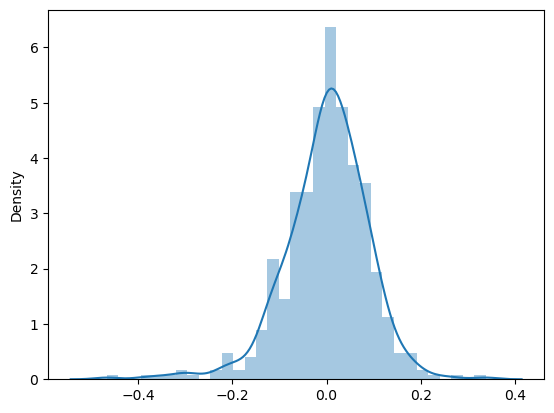

In [49]:
y_train_pred = lr_model6.predict(X_train_sm)
res = y_train-y_train_pred
sns.distplot(res)

## Step 5: Prediction and evaluation on the Test Set

In [51]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

#Fit on data
df_test[num_vars]= scaler.transform(df_test[num_vars])  # Fit and transform the data      
df_test.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Light Snow/Light Rain + Scattered clouds,Mist + Cloudy + Few clouds,Spring,Summer,Winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [52]:
y_test=df_test.pop('cnt')
X_test=df_test

In [53]:
#add constant
X_test_sm= sm.add_constant(X_test)


In [54]:
X_test_sm= X_test_sm.drop(['holiday','atemp', 'hum','Aug', 'Feb',
                           'Jun', 'Mar', 'May', 'Sat','Thur', 'Tue', 'Wed','Oct','Mon','Summer'],axis=1)

In [55]:
y_test_pred = lr_model6.predict(X_test_sm)

In [56]:
#evaluate

r2_score(y_true=y_test,y_pred=y_test_pred)

0.8194293965277097

Key Takeaways:
The small gap between the two scores demonstrates that the model is robust and has good predictive power.